In [119]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.getcwd()

'C:\\Users\\Admin\\3D Objects\\imarticus PGDA\\Machine learning\\Unsupervised Learning\\Clustering\\Dataset Clustering\\FMCG Store Customers'

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Segmentation data - Legend										
The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 										
										
Variable	Data type	Range	Description							
ID	numerical	Integer	Shows a unique identificator of a customer.							
										
Sex	categorical	{0,1}	Biological sex (gender) of a customer. In this dataset there are only 2 different options.							
		0	male							
		1	female							
										
Marital status	categorical	{0,1}	Marital status of a customer.							
		0	single							
		1	non-single (divorced / separated / married / widowed)							
										
Age	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset							
		18	Min value (the lowest age observed in the dataset)							
		76	Max value (the highest age observed in the dataset)							
										
Education	categorical	{0,1,2,3}	Level of education of the customer							
		0	other / unknown							
		1	high school							
		2	university							
		3	graduate school							
										
Income	numerical	Real	Self-reported annual income in US dollars of the customer.							
		35832	Min value (the lowest income observed in the dataset)							
		309364	Max value (the highest income observed in the dataset)							
										
Occupation	categorical	{0,1,2}	Category of occupation of the customer.							
		0	unemployed / unskilled							
		1	skilled employee / official							
		2	management / self-employed / highly qualified employee / officer							
										
Settlement size	categorical	{0,1,2}	The size of the city that the customer lives in.							
		0	small city
		1	mid-sized city
		2	big city

In [11]:
df=pd.read_csv('segmentation data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


### EDA Understand and prepare the data 

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Visualization<br>
                        5. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Sex,2000.0,4.570000e-01,0.498272,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Marital status,2000.0,4.965000e-01,0.500113,0.0,0.000000e+00,0.0,1.000000e+00,1.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Education,2000.0,1.038000e+00,0.599780,0.0,1.000000e+00,1.0,1.000000e+00,3.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0
Occupation,2000.0,8.105000e-01,0.638587,0.0,0.000000e+00,1.0,1.000000e+00,2.0
Settlement size,2000.0,7.390000e-01,0.812533,0.0,0.000000e+00,1.0,1.000000e+00,2.0


<AxesSubplot:>

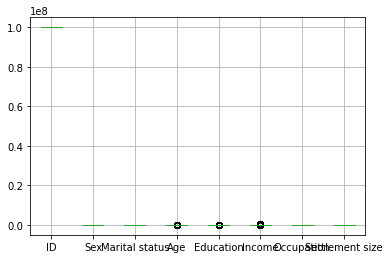

In [15]:
df.boxplot()

In [18]:
# Checking the nulls
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

### EDA and Visualization

##### sex

In [20]:
df.Sex.unique()

array([0, 1], dtype=int64)

In [85]:
df.Sex.value_counts()

0    1086
1     914
Name: Sex, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


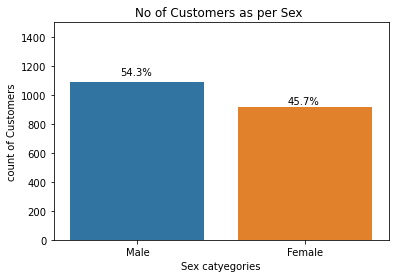

In [95]:
sns.countplot(df.Sex)
plt.xlabel('Sex catyegories')
plt.ylabel('count of Customers')
plt.title('No of Customers as per Sex ')
plt.xticks([0,1],labels=['Male','Female'])
plt.ylim(0,1500)

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = df.Sex.value_counts()[0] + 50, s = str(round((df.Sex.value_counts()[0])*100/len(df.Sex),2)) + '%')
plt.text(x = 0.9, y = df.Sex.value_counts()[1] + 20, s = str(round((df.Sex.value_counts()[1])*100/len(df.Sex),2)) + '%')
plt.show()

In [27]:
df

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

##### Marital status

In [65]:
df['Marital status'].value_counts()

0    1007
1     993
Name: Marital status, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


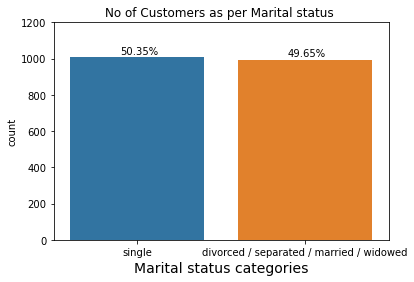

In [153]:
sns.countplot(df['Marital status'])
plt.xlabel('Marital status categories',fontsize=14)
#plt.ylabel('count of Customers')
plt.title('No of Customers as per Marital status ')
plt.xticks([0,1],labels=['single','divorced / separated / married / widowed'])
plt.ylim(0,1200)

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = df['Marital status'].value_counts()[0] + 20, s = str(round((df['Marital status'].value_counts()[0])*100/len(df.Sex),2)) + '%')
plt.text(x = 0.9, y =df['Marital status'].value_counts()[1] + 20, s = str(round((df['Marital status'].value_counts()[1])*100/len(df.Sex),2)) + '%')
plt.show()

##### Age

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Customers as per Age ')

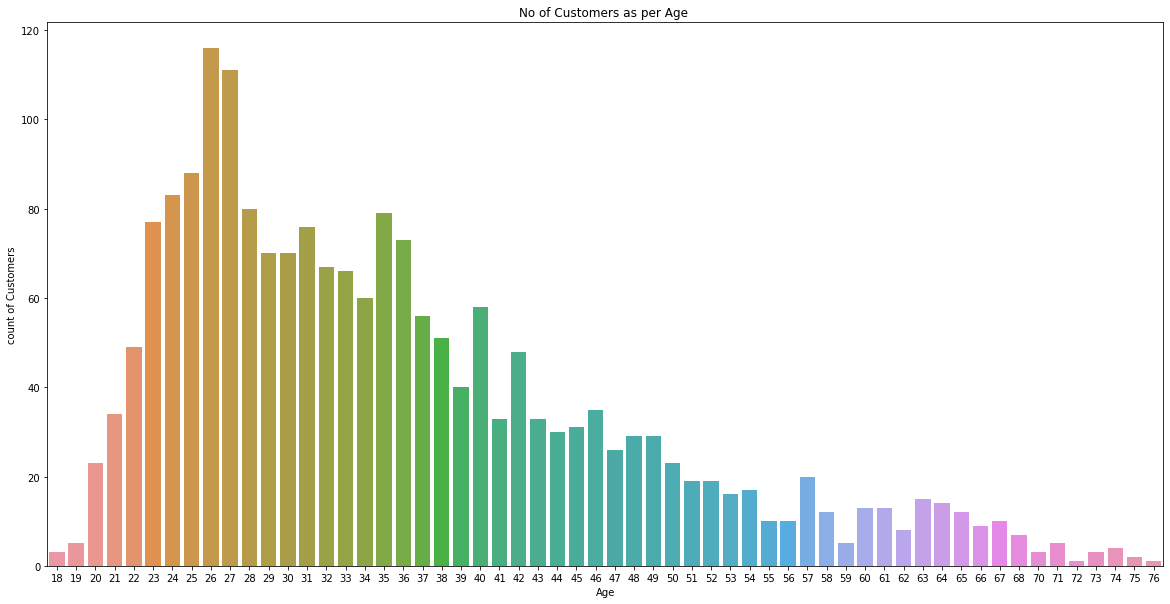

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('count of Customers')
plt.title('No of Customers as per Age ')
#plt.xticks([0,1],labels=['single','divorced / separated / married / widowed'])
#plt.ylim(0,1500)

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

#### ALL Visualization

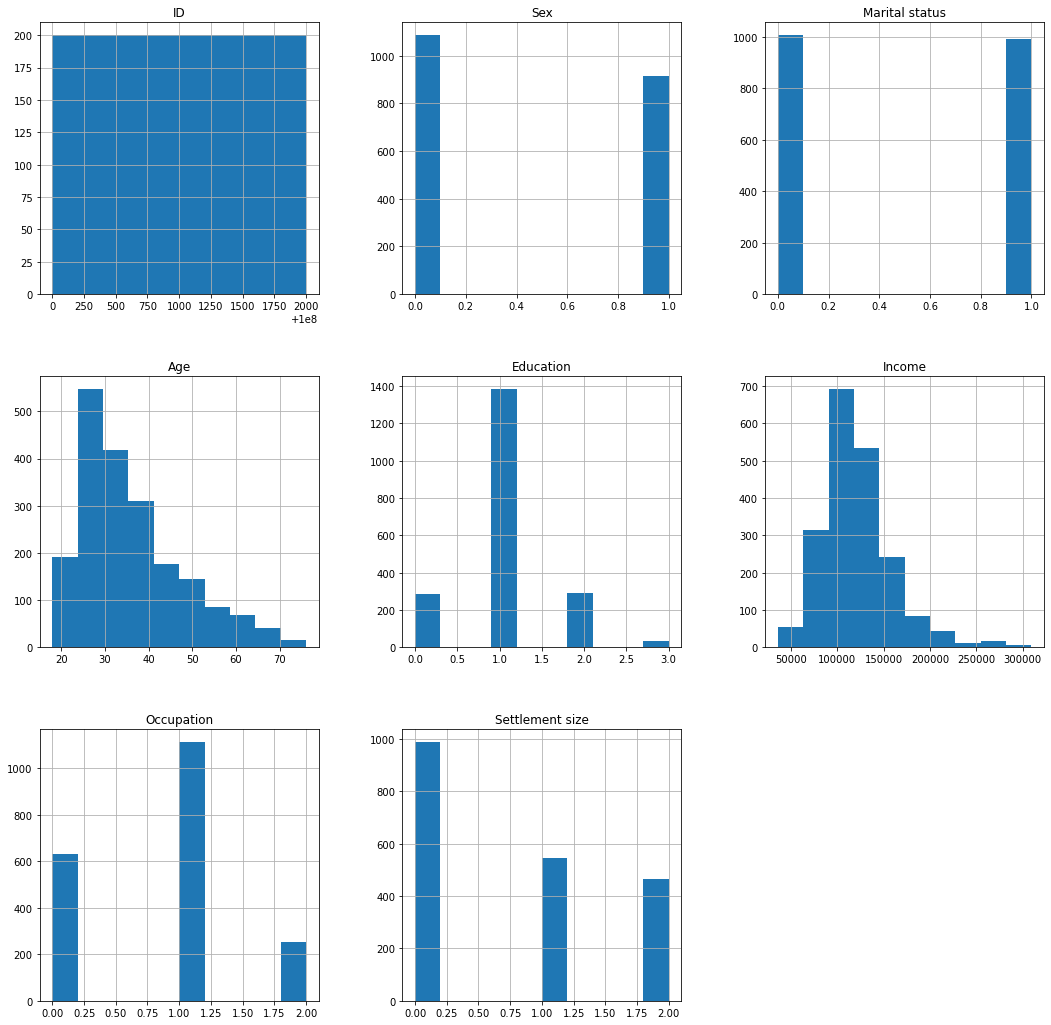

In [101]:
fig = df.hist(figsize = (18,18))

### Featutre Scaling of data

In [131]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

df_sc=sc.fit_transform(df)
df_sc=pd.DataFrame(df_sc,columns=df.columns)
df_sc

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...,...
1995,1.724257,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.725989,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,1.727721,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.729453,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


### Model Building with K Means Clustering

In [132]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create a list of clusters
n_clusters=range(2,25)

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for k in n_clusters :
    cluster= KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_sc)
    
    score=silhouette_score(df_sc,predict,random_state=10)
    print("For cluster ={},Silhouette score is {}".format(k,score))
    

For cluster =2,Silhouette score is 0.23414854236280416
For cluster =3,Silhouette score is 0.24436844393676216
For cluster =4,Silhouette score is 0.23444671406267498
For cluster =5,Silhouette score is 0.22623488010131207
For cluster =6,Silhouette score is 0.2346740212563777
For cluster =7,Silhouette score is 0.2342456673800176
For cluster =8,Silhouette score is 0.24087020795793643
For cluster =9,Silhouette score is 0.22870150277268209
For cluster =10,Silhouette score is 0.2542209405504801
For cluster =11,Silhouette score is 0.2560593182674908
For cluster =12,Silhouette score is 0.27174708304762124
For cluster =13,Silhouette score is 0.2779614603369869
For cluster =14,Silhouette score is 0.2775387130201005
For cluster =15,Silhouette score is 0.27057386688868756
For cluster =16,Silhouette score is 0.2728460752691361
For cluster =17,Silhouette score is 0.2800849412365506
For cluster =18,Silhouette score is 0.2826861822971599
For cluster =19,Silhouette score is 0.270535582688857
For cluster

##### Buliding the model with Optimum K value= 3

In [134]:
# Model building
model=KMeans(n_clusters=3,random_state=10)

# fiitng the model
model.fit(df_sc)

KMeans(n_clusters=3, random_state=10)

### Retrieve Clusters

**As we have built the 3 clusters, now we want to know which customers belong to which cluster. 'model.labels_' can give the cluster number in which the customer belongs**

In [137]:
model.labels_

array([1, 2, 2, ..., 0, 0, 0])

In [139]:
df_cluster=df.copy(deep=True)
df_cluster['Cluster']=model.labels_
df_cluster

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,1
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,2
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,0
1996,100001997,1,1,27,1,117744,1,0,0
1997,100001998,0,0,31,0,86400,0,0,0
1998,100001999,1,1,24,1,97968,0,0,0


In [140]:
df_cluster.Cluster.value_counts()

0    921
2    790
1    289
Name: Cluster, dtype: int64

##### Plot a barplot to visualize the cluster sizes

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


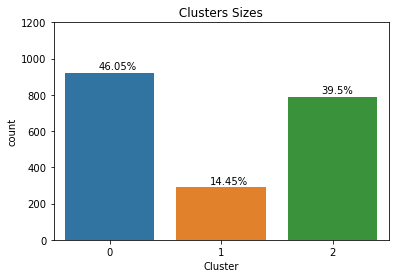

In [154]:
sns.countplot(df_cluster['Cluster'])
#plt.xlabel('Clusters')
#plt.ylabel('count of Customers')
plt.title(' Clusters Sizes ')
#plt.xticks([0,1],labels=['single','divorced / separated / married / widowed'])
plt.ylim(0,1200)

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = df_cluster['Cluster'].value_counts()[0] + 20, s = str(round((df_cluster['Cluster'].value_counts()[0])*100/len(df.Sex),2)) + '%')
plt.text(x = 0.9, y =df_cluster['Cluster'].value_counts()[1] + 20, s = str(round((df_cluster['Cluster'].value_counts()[1])*100/len(df.Sex),2)) + '%')
plt.text(x = 1.9, y =df_cluster['Cluster'].value_counts()[2] + 20, s = str(round((df_cluster['Cluster'].value_counts()[2])*100/len(df.Sex),2)) + '%')

plt.show()

**So cluster 0 is the largest cluster**